In [1]:
pip install livelossplot

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout,Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from livelossplot import PlotLossesKerasTF
from tensorflow.keras.optimizers import Adam
import random

In [3]:
x_train = np.load('/X_train.npy')
y_train = np.load('/Y_train.npy')
x_test = np.load('/X_test.npy')
y_test = np.load('/Y_test.npy')

In [4]:
img_size = 224

In [5]:
vgg = VGG19(weights="imagenet",include_top = False,input_shape=(img_size,img_size,3))
vgg.layer.trainable = False

model = Sequential()
model.add(vgg)
model.add(Flatten())
model.add(Dense(1,activation="sigmoid"))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 25089     
Total params: 20,049,473
Trainable params: 25,089
Non-trainable params: 20,024,384
_________________________________________________________________


In [6]:
checkpoint = ModelCheckpoint("model_weights_1.h5",monitor="val_accuracy",save_best_only=True,
                             save_weights_only=False, mode='max', verbose=1)
learn_rate = ReduceLROnPlateau(monitor='val_loss', factor=0.1,patience=2, min_lr=0.00001, mode='auto')

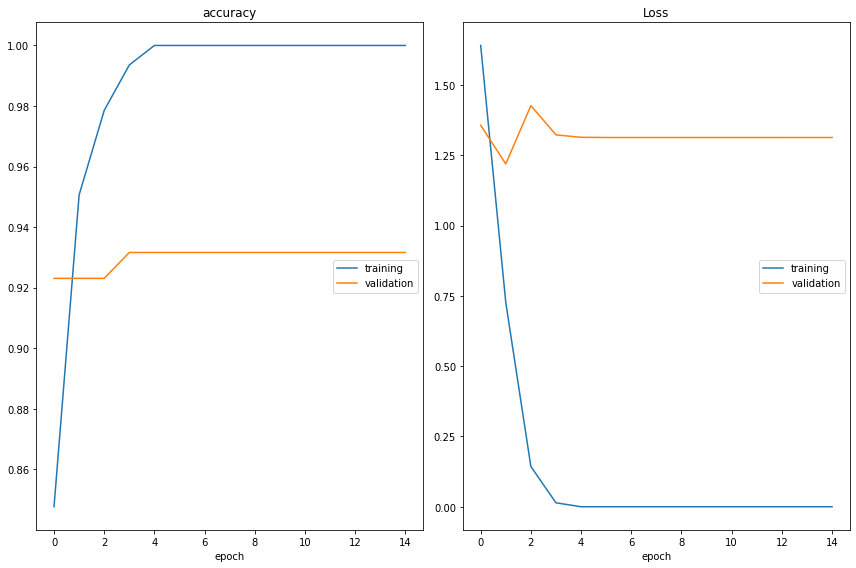

accuracy
	training         	 (min:    0.848, max:    1.000, cur:    1.000)
	validation       	 (min:    0.923, max:    0.932, cur:    0.932)
Loss
	training         	 (min:    0.000, max:    1.640, cur:    0.000)
	validation       	 (min:    1.219, max:    1.426, cur:    1.313)

Epoch 00015: val_accuracy did not improve from 0.93162


In [7]:
History = model.fit(x_train,y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test), verbose=1,callbacks=[PlotLossesKerasTF(),checkpoint,learn_rate])

In [8]:
loss,accuracy = model.evaluate(x_test,y_test)
print("loss:",loss)
print("Accuracy:",accuracy)

4/4 [==============================] - 1s 152ms/step - loss: 1.3131 - accuracy: 0.9316
loss: 1.31307053565979
Accuracy: 0.9316239356994629


In [9]:
pred = model.predict_classes(x_test)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [10]:
conf = confusion_matrix(y_test, pred)
print(conf)
print(classification_report(y_test,pred))

[[58  5]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.94        63
           1       0.91      0.94      0.93        54

    accuracy                           0.93       117
   macro avg       0.93      0.93      0.93       117
weighted avg       0.93      0.93      0.93       117



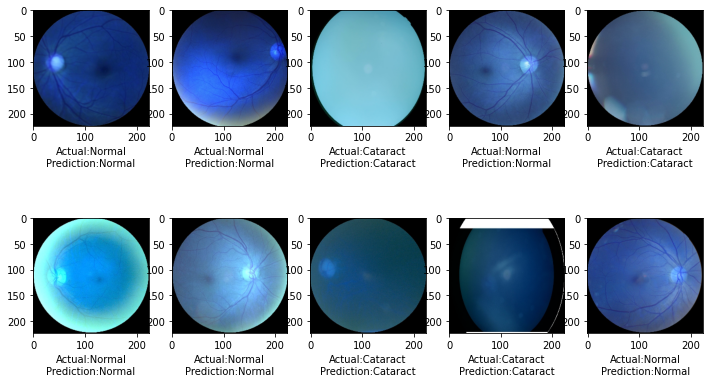

In [12]:
plt.figure(figsize=(12,7))
for num in range(10):
  exp = random.choice(range(len(x_test)))
  img = x_test[exp]
  value = y_test[exp]
  predicted_value = pred[exp]
  
  if value == 0:
      actual_label = "Normal"
  else:
      actual_label = "Cataract"
      
  if predicted_value == 0:
      predicted_label = "Normal"
  else:
      predicted_label = "Cataract"
      
  plt.subplot(2,5,num+1)
  plt.imshow(img)
  plt.xlabel("Actual:{}\nPrediction:{}".format(actual_label,predicted_label))